# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discrete Fourier Transform

## Formel

$X_{k}=\sum_{n = 0}^{N - 1}x_{n} \cdot e^{-{\frac {n}{N}}i 2 \pi k}$

- $k$: Frequenz-Index ($0 \le k < N$)
- $n$: Sample-Index ($0 \le n < N$)
- $N$: Anzahl der Samples / Anzahl der gemessenen Frequenzen

## eigene Implementierung

In [2]:
def own_dft(x):
    
    N = x.size
    
    X = np.zeros(N, dtype=complex)
    n = np.arange(N)
    
    for k in range(N):
        
        X[k] = np.sum(x * np.exp(-1 * n / N * 1j * 2 * np.pi * k))

    return X

## Signale analysieren

### simultane Frequenzen

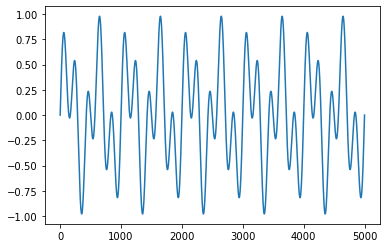

In [3]:
# 2 hz 5 hz, sr 1000, length 5 sec

freq1, freq2 = 2, 5
sr = 1000
length = 5

t = np.linspace(0, length, sr * length)
x = (np.sin(t * 2 * np.pi * freq1) * 0.5) +\
    (np.sin(t * 2 * np.pi * freq2) * 0.5)

plt.plot(x)
plt.show()

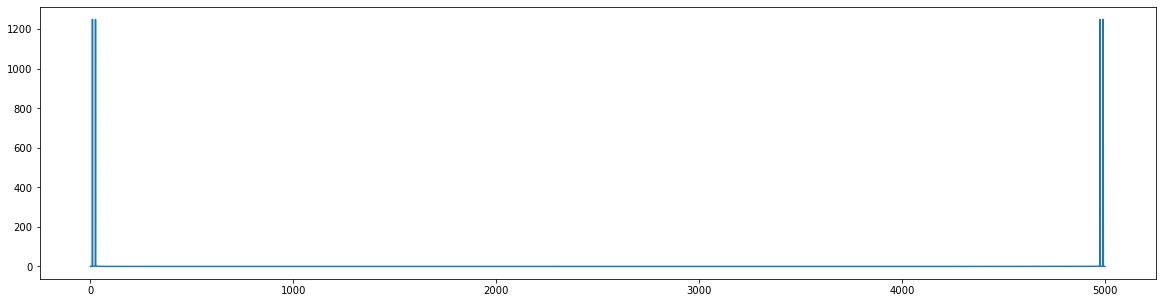

In [4]:
dft = own_dft(x)

plt.figure(figsize=(20, 5))
plt.plot(np.abs(dft))
plt.show()

> Vorsicht: die Zahlen auf der x-Achse dürfen nicht als Frequenz in Hz interpretiert werden.
> Tatsächlich handelt es sich um die k-ste Frequenz (k-th frequency)

### k-Frequenz-Index -> Frequenz in Herz

Um für einen Frequenz-Index $k$ die entsprechende Frequenz in Herz des Fourier-Koeffizienten zu berechnen:

$f_{coef} = \dfrac{k \cdot sr}{N}$

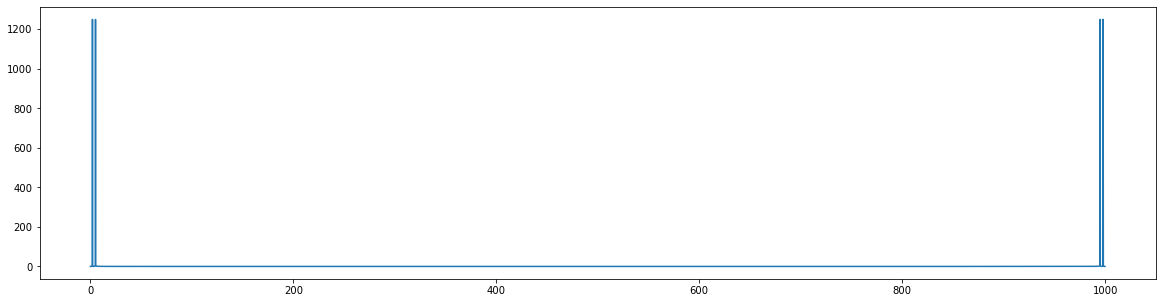

In [5]:
N = x.size
k = np.arange(N)
f_coef = k * sr / N



plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.show()

### Nyquist Grenze

Wir können also $N$ viele Frequenzen berechnen - die Anzahl der berechenbaren Frequenzen ist abhängig von der Länge des Signals (in Samples).

Gleichzeitig stellen wir fest, dass der Graph symmetrisch zu sein scheint. Die Frequenzen werden nämlich an der Nyquist-Grenze gespiegelt:

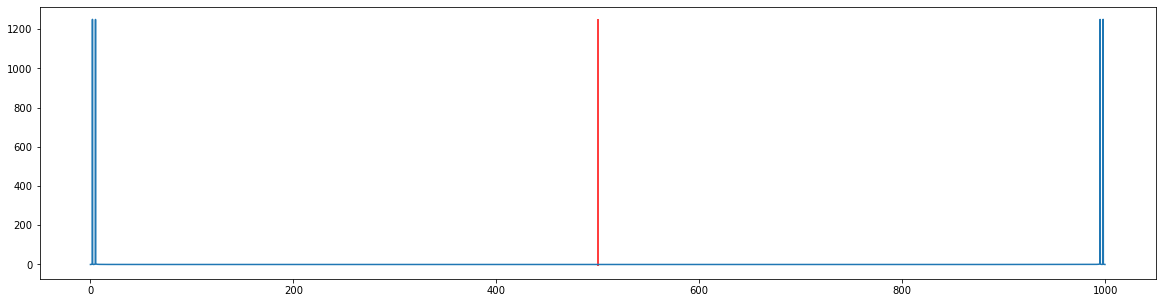

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.vlines(sr / 2, -10, np.max(np.abs(dft)), color=[1, 0, 0, 1])
plt.show()

### relevanten Ausschnitt plotten

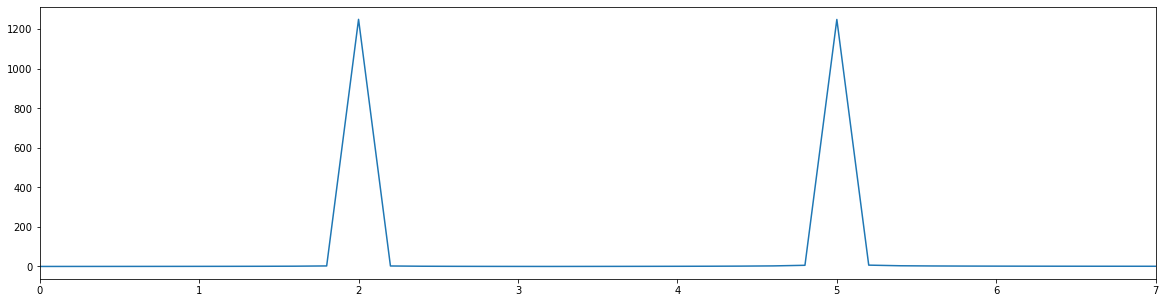

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.xlim(0, 7)
plt.show()

### konsekutive Frequenzen

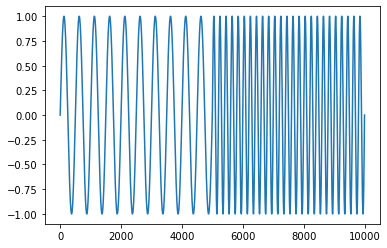

In [8]:
# 2 hz 5 hz, sr 1000, length 5 sec

freq1, freq2 = 2, 5
sr = 1000
length = 10

t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:(sr * length // 2)] * 2 * np.pi * freq1),
                    np.sin(t[(sr * length // 2):] * 2 * np.pi * freq2)))

plt.plot(x)
plt.show()

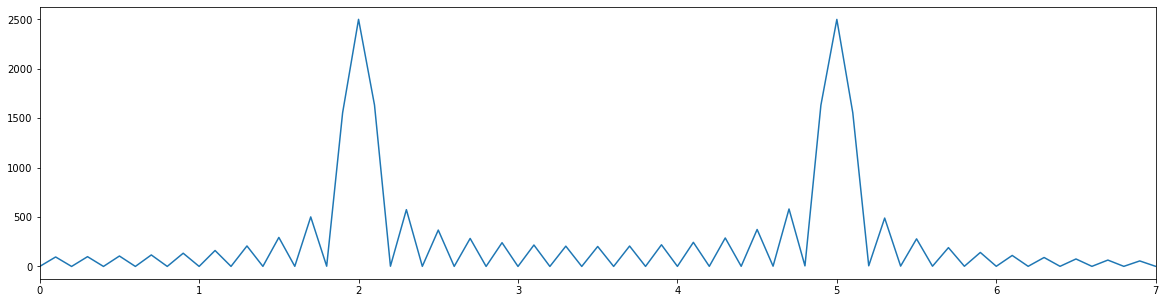

In [9]:
dft = own_dft(x)

N = x.size
k = np.arange(N)
f_coef = k * sr / N

plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.xlim(0, 7)
plt.show()

### simultane Frequenzen - untersch. Amplituden

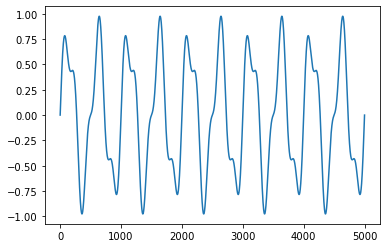

In [10]:
# 2 hz 5 hz, sr 1000, length 5 sec

freq1, freq2 = 2, 5
sr = 1000
length = 5

t = np.linspace(0, length, sr * length)
x = (np.sin(t * 2 * np.pi * freq1) * 0.75) +\
    (np.sin(t * 2 * np.pi * freq2) * 0.25)

plt.plot(x)
plt.show()

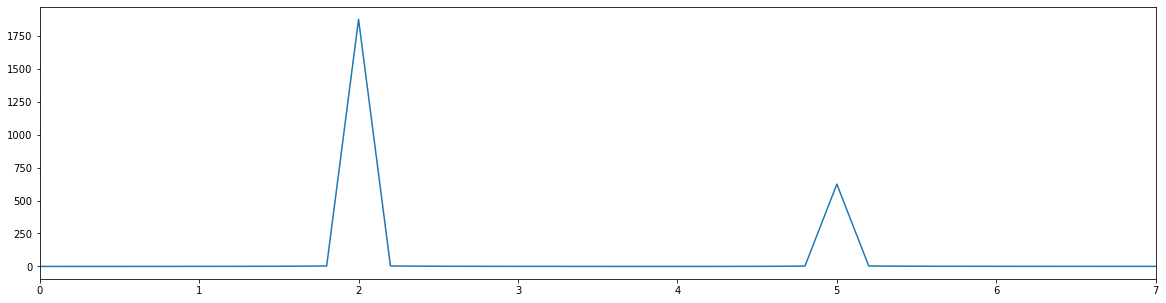

In [11]:
dft = own_dft(x)

N = x.size
k = np.arange(N)
f_coef = k * sr / N

plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.xlim(0, 7)
plt.show()

### konsekutive Frequenzen - untersch. lang

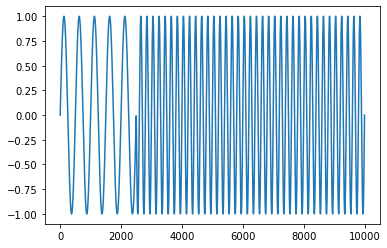

In [12]:
# 2 hz 5 hz, sr 1000, length 5 sec

freq1, freq2 = 2, 5
sr = 1000
length = 10

t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:(sr * length // 4)] * 2 * np.pi * freq1),
                    np.sin(t[(sr * length // 4):] * 2 * np.pi * freq2)))

plt.plot(x)
plt.show()

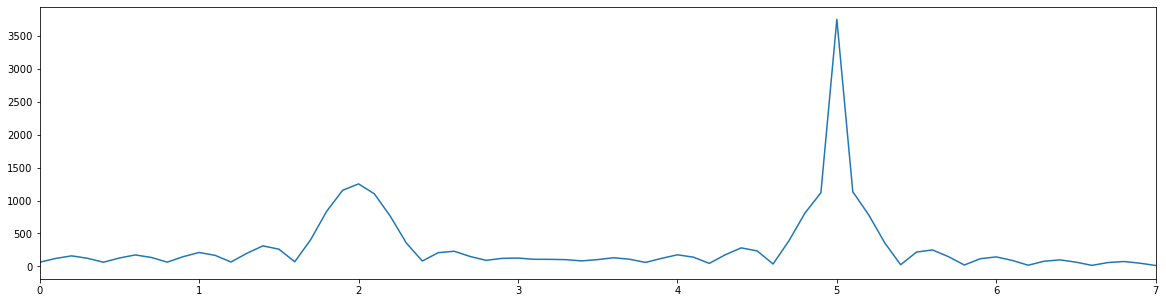

In [13]:
dft = own_dft(x)

N = x.size
k = np.arange(N)
f_coef = k * sr / N

plt.figure(figsize=(20, 5))
plt.plot(f_coef, np.abs(dft))
plt.xlim(0, 7)
plt.show()